In [1]:
import awkward as ak
import pandas as pd
import numpy as np
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
hep.style.use("CMS")

In [29]:
#Set the benchmark to analyze
#BM = "bkg"
BM = 2

#Set the number of jets you want to take into account in your analysis
n_jets = 4
n_lep = 4

if BM == 1:
    fname = "/cms/mc/MG5_aMC_v3_1_1/pp2monojet_tjj/Events/run_02/tag_1_delphes_events.root"
    x_sec = 0.000205 * 1e-12
if BM == 2:
    fname = "/cms/mc/MG5_aMC_v3_1_1/pp2monojet_tjj/Events/run_03/tag_1_delphes_events.root"
    x_sec = 0.004521995016 * 1e-12
if BM == "bkg":
    fname = "/cms/mc/MG5_aMC_v3_1_1/Pp2DY_Plus_Jets_Nu/Events/run_05/tag_1_delphes_events.root"
    x_sec = 110.1 * 1e-12

tree_test = dm.Converter(fname)
tree_test.generate(jet_elements = n_jets, e_mu_elements = n_lep)
df = tree_test.df

In [30]:
print(df.shape[0])
print(df.columns)
df.head()

100000
Index(['jet_pt0', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0', 'jet_eta1',
       'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2', 'jet_phi3',
       'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3', 'jet_btag0',
       'jet_btag1', 'jet_btag2', 'jet_btag3', 'jet_tautag0', 'jet_tautag1',
       'jet_tautag2', 'jet_tautag3', 'muon_pt0', 'muon_pt1', 'muon_pt2',
       'muon_pt3', 'muon_eta0', 'muon_eta1', 'muon_eta2', 'muon_eta3',
       'muon_phi0', 'muon_phi1', 'muon_phi2', 'muon_phi3', 'muon_charge0',
       'muon_charge1', 'muon_charge2', 'muon_charge3', 'electron_pt0',
       'electron_pt1', 'electron_pt2', 'electron_pt3', 'electron_eta0',
       'electron_eta1', 'electron_eta2', 'electron_eta3', 'electron_phi0',
       'electron_phi1', 'electron_phi2', 'electron_phi3', 'electron_charge0',
       'electron_charge1', 'electron_charge2', 'electron_charge3',
       'missinget_met', 'missinget_phi'],
      dtype='object')


,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3,missinget_met,missinget_phi
0,121.247055,96.271706,NaN,NaN,-0.678106,1.651788,NaN,NaN,-2.437745,-0.104317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.045868,1.065077
1,104.516129,70.343246,43.466957,38.612183,-1.205086,-3.079658,-1.901753,-0.578033,1.201630,-1.338427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.563248,-2.810907
2,164.975113,40.105881,36.400639,29.770086,-0.030537,2.164575,2.722820,4.060440,-0.784625,0.745056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.483810,2.429050
3,63.200615,45.251610,NaN,NaN,0.019984,0.303811,NaN,NaN,1.032577,1.968379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.974884,-1.781175
4,89.375999,34.242405,27.257490,NaN,-0.387554,2.799000,2.107308,NaN,2.464113,-3.128538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.551254,-0.348476


# Cutting

In [35]:
#Cut p_T^{miss} > 200 GeV
df_cut = df[df['missinget_met'] > 200]

In [36]:
#Cut p_T(j0) > 100 GeV
df_cut = df_cut[df_cut['jet_pt0'] > 100]

In [37]:
#Cut eta(j0) > 2.5 
df_cut = df_cut[np.abs(df_cut['jet_eta0']) < 2.5]

In [38]:
#Cut HT > 110 GeV
#HT := sum(jet_pt) over all the jets per event
#Sumar solo por los que tengan mayor pt que 20
df_cut = df_cut[np.sum(df_cut[[f"jet_pt{i}" for i in range(n_jets)]], axis = 1) > 110]
df_cut

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_phi0,electron_phi1,electron_phi2,electron_phi3,electron_charge0,electron_charge1,electron_charge2,electron_charge3,missinget_met,missinget_phi
8,431.458160,84.957382,53.575294,45.987091,-0.044805,0.520480,-0.300844,-2.040350,2.470102,1.403590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444.628143,-0.996051
15,298.350098,46.023060,NaN,NaN,-1.531103,2.196770,NaN,NaN,1.916871,2.318414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352.690826,-1.106398
22,344.961853,NaN,NaN,NaN,-0.073621,NaN,NaN,NaN,-2.596451,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.032990,0.554909
23,222.927902,219.131317,155.120010,NaN,-0.092298,0.876579,-0.911990,NaN,1.746764,2.298152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578.050171,-1.066204
24,263.376740,167.443756,70.156189,23.810150,1.313579,0.768170,-1.926645,-2.004530,-2.513714,2.986818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469.267700,0.408553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,835.081482,684.336304,95.213989,NaN,0.827728,-1.504818,-0.784282,NaN,0.508158,1.294855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1503.037354,-2.289335
99987,139.465851,87.009003,NaN,NaN,-1.264353,-2.118895,NaN,NaN,-2.948307,-2.820384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.166840,0.189186
99989,142.887817,96.270309,30.471178,24.019970,0.368422,-2.036904,-2.383590,-1.867179,0.769482,-0.265425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.097473,-2.727378
99996,1188.040771,NaN,NaN,NaN,1.001319,NaN,NaN,NaN,-2.873955,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1189.271484,0.263648


In [39]:
df_cut.apply(dm.veto_tag, axis = 1, args = ["b", 4])
#veto_tag(df_cut, "b", n_jets = 4)

8        0
15       0
22       0
23       0
24       0
        ..
99984    0
99987    0
99989    0
99996    0
99997    0
Length: 29519, dtype: int64

In [40]:
df_cut['n_taus'] = df_cut.apply(dm.veto_tag, axis = 1, args = ["tau", n_jets])
df_cut['n_bs'] = df_cut.apply(dm.veto_tag, axis = 1, args = ["b", n_jets])
df_cut['n_ele'] = df_cut.apply(dm.veto_tag, axis = 1, args = ["electron", n_lep])
df_cut['n_mu'] = df_cut.apply(dm.veto_tag, axis = 1, args = ["muon", n_lep])
#df_cut['b_pt'] = df_cut.apply(dm.pt_tag_extractor, args=('b', n_jets), axis = 1)

In [41]:
df_cut = df_cut[df_cut['n_taus'] < 1]
df_cut = df_cut[df_cut['n_bs'] < 1]
df_cut = df_cut[df_cut['n_ele'] < 1]
df_cut = df_cut[df_cut['n_mu'] < 1]

Corregir la función anterior: Contar el número de Taus por evento con las condiciones, si hay al menos uno de ellos, quitar el evento.

In [15]:
#Cut over tau's pt
#df_cut = df_cut[(df_cut.tau_pt.isna()) 
#                | (df_cut.tau_pt < 18)]
#df_cut = df_cut[(df_cut.tau_eta.isna()) 
#                | (np.abs(df_cut.tau_eta) > 2.5)]

#Veto over charged leptons pt and pseudorapidity
#df_cut = df_cut[(df_cut.electron_pt0.isna()) 
#                | (df_cut.electron_pt0 < 10)]
#df_cut = df_cut[(df_cut.electron_eta0.isna()) 
#                | (np.abs(df_cut.electron_eta0) > 2.5)]
#df_cut = df_cut[(df_cut.muon_pt0.isna()) 
#                | (df_cut.muon_pt0 < 10)]
#df_cut = df_cut[(df_cut.muon_eta0.isna()) 
#                | (np.abs(df_cut.muon_eta0) > 2.4)]

#Veto over b-jets
#df_cut = df_cut[(df_cut.b_pt.isna()) 
#                | (df_cut.b_pt < 15)]
df_cut

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,electron_charge0,electron_charge1,electron_charge2,electron_charge3,missinget_met,missinget_phi,n_taus,n_bs,n_ele,n_mu
3,439.406830,48.945728,NaN,NaN,-0.651008,0.367408,NaN,NaN,-1.840321,-0.679355,...,NaN,NaN,NaN,NaN,441.499847,1.398704,0,0,0,0
12,383.409088,128.272751,51.276905,38.514835,-0.137008,1.053750,2.147645,0.023411,0.837802,-2.434117,...,NaN,NaN,NaN,NaN,269.537415,-2.542856,0,0,0,0
15,195.789520,110.688332,64.589211,NaN,1.098574,1.232717,0.774483,NaN,1.155086,2.253294,...,NaN,NaN,NaN,NaN,256.572205,-1.308422,0,0,0,0
16,493.249146,254.381271,47.912643,47.362309,-0.444849,0.372069,1.393899,0.950267,-0.121527,-0.395477,...,NaN,NaN,NaN,NaN,753.557007,2.895225,0,0,0,0
20,464.880798,172.602997,100.442093,61.217239,-0.818579,2.038434,2.942086,1.535323,-1.851437,0.887635,...,NaN,NaN,NaN,NaN,237.098175,1.182320,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99956,272.836945,NaN,NaN,NaN,-0.591078,NaN,NaN,NaN,-0.919022,NaN,...,NaN,NaN,NaN,NaN,275.738464,2.305407,0,0,0,0
99972,179.635574,73.257301,51.210102,24.243309,-0.125468,3.052625,2.667988,0.010608,1.125650,-0.586207,...,NaN,NaN,NaN,NaN,262.343170,-2.362877,0,0,0,0
99977,392.163544,26.494116,NaN,NaN,-0.005069,1.015536,NaN,NaN,-1.362357,-1.607114,...,NaN,NaN,NaN,NaN,455.665497,1.783178,0,0,0,0
99991,113.800903,108.037361,46.229107,40.826080,-0.150355,-0.162279,0.040842,1.703656,2.885420,1.553304,...,NaN,NaN,NaN,NaN,246.760635,-0.911936,0,0,0,0


In [42]:
df_cut["deltaphi_jet0_met"] = df_cut.apply(dm.DeltaPhi, args = ("jet_phi0", "missinget_phi"), axis = 1)
df_cut["deltaphi_jet1_met"] = df_cut.apply(dm.DeltaPhi, args = ("jet_phi1", "missinget_phi"), axis = 1)
df_cut["deltaphi_jet2_met"] = df_cut.apply(dm.DeltaPhi, args = ("jet_phi2", "missinget_phi"), axis = 1)
df_cut["deltaphi_jet3_met"] = df_cut.apply(dm.DeltaPhi, args = ("jet_phi3", "missinget_phi"), axis = 1)
#df_cut["deltaphi_jet0_jet1"] = df_cut.apply(dm.DeltaPhi, args = ("jet_phi0", "jet_phi1"), axis = 1)

df_copy = df_cut.copy()

In [43]:
df_cut = df_cut[np.abs(df_cut["deltaphi_jet0_met"]) > 0.5]
df_cut = df_cut[(np.abs(df_cut["deltaphi_jet1_met"]) > 0.5) | (df_cut["deltaphi_jet1_met"].isna())]
df_cut = df_cut[(np.abs(df_cut["deltaphi_jet2_met"]) > 0.5) | (df_cut["deltaphi_jet2_met"].isna())]
df_cut = df_cut[(np.abs(df_cut["deltaphi_jet3_met"]) > 0.5) | (df_cut["deltaphi_jet3_met"].isna())]
#df_cut = df_cut[(np.abs(df_cut["deltaphi_jet0_jet1"]) > 3.5) | (df_cut["deltaphi_jet0_jet1"].isna())]
df_cut

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,missinget_met,missinget_phi,n_taus,n_bs,n_ele,n_mu,deltaphi_jet0_met,deltaphi_jet1_met,deltaphi_jet2_met,deltaphi_jet3_met
8,431.458160,84.957382,53.575294,45.987091,-0.044805,0.520480,-0.300844,-2.040350,2.470102,1.403590,...,444.628143,-0.996051,0,0,0,0,-2.817032,2.399641,1.683567,-2.061059
22,344.961853,NaN,NaN,NaN,-0.073621,NaN,NaN,NaN,-2.596451,NaN,...,356.032990,0.554909,0,0,0,0,3.131825,NaN,NaN,NaN
23,222.927902,219.131317,155.120010,NaN,-0.092298,0.876579,-0.911990,NaN,1.746764,2.298152,...,578.050171,-1.066204,0,0,0,0,2.812968,-2.918829,-2.900763,NaN
24,263.376740,167.443756,70.156189,23.810150,1.313579,0.768170,-1.926645,-2.004530,-2.513714,2.986818,...,469.267700,0.408553,0,0,0,0,-2.922267,2.578265,-2.907524,-2.300096
27,218.541519,70.265083,NaN,NaN,-0.010830,0.004815,NaN,NaN,-1.080112,-1.734361,...,264.462860,2.083319,0,0,0,0,3.119754,2.465505,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,141.156937,84.167313,49.214931,NaN,0.665159,-0.902394,-1.101038,NaN,-2.524279,-1.409272,...,215.257370,0.767774,0,0,0,0,2.991132,-2.177046,1.969048,NaN
99983,223.177994,170.556610,109.302986,101.091675,-0.569387,-2.449651,-0.734452,-1.206533,0.833625,0.422845,...,590.778137,-2.513984,0,0,0,0,-2.935576,2.936829,2.864771,-2.943987
99987,139.465851,87.009003,NaN,NaN,-1.264353,-2.118895,NaN,NaN,-2.948307,-2.820384,...,243.166840,0.189186,0,0,0,0,-3.137493,-3.009570,NaN,NaN
99989,142.887817,96.270309,30.471178,24.019970,0.368422,-2.036904,-2.383590,-1.867179,0.769482,-0.265425,...,267.097473,-2.727378,0,0,0,0,-2.786326,2.461952,3.115553,-2.661887


In [44]:
x_sec_teo = 7.277487e-5 * 1e-12
if BM == "bkg":
    Luminosity = 12.9
else:
    Luminosity = 12.9
n_mc_ev = df.shape[0]
n_ex_ev = x_sec * Luminosity / (1e-15)
w = n_ex_ev / n_mc_ev
n_ex_ev

58.3337357064

In [45]:
w

0.000583337357064

In [46]:
w * df_cut.shape[0]

12.808921686411312

In [47]:
bins = np.concatenate([np.arange(200, 330, 30),
                       np.arange(350, 560, 40),
                       np.arange(590, 800, 50),
                       np.arange(840, 1030, 60),
                       np.arange(1090, 1170, 70),
                       np.array([2000])])
bins

array([ 200,  230,  260,  290,  320,  350,  390,  430,  470,  510,  550,
        590,  640,  690,  740,  790,  840,  900,  960, 1020, 1090, 1160,
       2000])

In [48]:

bins = np.concatenate([np.arange(200, 330, 30),
                       np.arange(350, 560, 40),
                       np.arange(590, 800, 50),
                       np.arange(840, 1030, 60),
                       np.arange(1090, 1170, 70),
                       np.array([2000])])
#bins
counts, ptmiss = np.histogram(df_cut.missinget_met, bins)
counts = counts * w
di_missing_et = {f"{ptmiss[i]} - {ptmiss[i+1]}" :
                 counts[i] for i in range(len(bins)-1)}

di_missing_et

{'200 - 230': 2.030597339939784,
 '230 - 260': 1.63917797334984,
 '260 - 290': 1.364426078172696,
 '290 - 320': 1.139257858345992,
 '320 - 350': 0.966590000655048,
 '350 - 390': 1.059340640428224,
 '390 - 430': 0.838255782100968,
 '430 - 470': 0.642254430127464,
 '470 - 510': 0.53083699492824,
 '510 - 550': 0.476003283364224,
 '550 - 590': 0.324335570527584,
 '590 - 640': 0.329002269384096,
 '640 - 690': 0.314418835457496,
 '690 - 740': 0.21466814739955198,
 '740 - 790': 0.17033450826268798,
 '790 - 840': 0.14875102605131998,
 '840 - 900': 0.156917749050216,
 '900 - 960': 0.10850074841390399,
 '960 - 1020': 0.07408384434712799,
 '1020 - 1090': 0.08050055527483199,
 '1090 - 1160': 0.050750350064567996,
 '1160 - 2000': 0.14583433926599998}

In [ ]:
df_jessica = pd.DataFrame(data = [di_missing_et.keys(), di_missing_et.values()]).T
df_jessica.columns = ["bins", "counts"]
df_jessica['bins_lower'] = ptmiss[:-1]
df_jessica.to_csv(f'pt_miss_histogram_monojet_BM{BM}.csv')

In [ ]:
df.head()

In [50]:
if BM == 1:
    bm1_counts = h1 * w
if BM == 2:
    bm2_counts = h1 * w

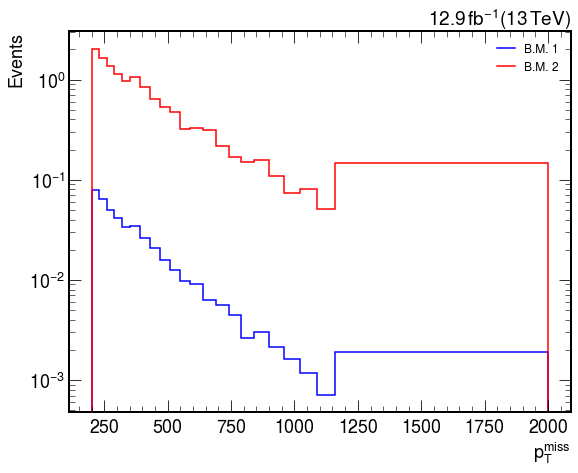

In [58]:
labs_sizes = 18
f, axs = plt.subplots( figsize=(9, 7))
hep.histplot(bm1_counts,
             bins = binss1,
             ax=axs, 
             histtype= 'step' ,
             #yerr= h1 ** 0.5 * w, 
             color = 'blue',
             label = 'B.M. 1'
            )
hep.histplot(bm2_counts,
             bins = binss1,
             ax=axs, 
             histtype= 'step' ,
             #yerr= h1 ** 0.5 * w, 
             color = 'red',
             label = 'B.M. 2'
            )

axs.set_xlabel("$p_T^{miss}$", fontsize = labs_sizes)
axs.set_ylabel('Events',fontsize = labs_sizes)
axs.set_yscale("log")
axs.legend(fontsize = labs_sizes - 6 , loc = 'best')
axs.xaxis.set_tick_params(labelsize= labs_sizes)
axs.yaxis.set_tick_params(labelsize= labs_sizes)
axs.set_title(r'$12.9 \,fb^{-1}(13 \,TeV)$', loc = 'right', fontsize = labs_sizes + 1)
plt.savefig("ptmiss_monojet");